In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [38]:
data = pd.read_csv('/content/drive/MyDrive/Unigap/Machine Learning/mini-project2 .csv')

#Data Cleaning

### Data Overview:

In [39]:
data.head(3)

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
1,2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2,2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1


In [40]:
data.shape

(97748, 24)

In [41]:
data.head(5)

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
1,2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2,2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
3,2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
4,2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


In [42]:
#Drop 2 first columns:
column_index = [0,1]
data = data.drop(data.columns[column_index], axis=1)
data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
1,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
3,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
4,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97748 entries, 0 to 97747
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  97748 non-null  object 
 1   cc_num                 97748 non-null  int64  
 2   merchant               97748 non-null  object 
 3   category               97748 non-null  object 
 4   amt                    97748 non-null  float64
 5   first                  97748 non-null  object 
 6   last                   97748 non-null  object 
 7   gender                 97748 non-null  object 
 8   street                 97748 non-null  object 
 9   city                   97748 non-null  object 
 10  state                  97748 non-null  object 
 11  zip                    97748 non-null  int64  
 12  lat                    97748 non-null  float64
 13  long                   97748 non-null  float64
 14  city_pop               97748 non-null  int64  
 15  jo

### Handle Missing Values + Duplicated

In [44]:
missing_rows_percentage = data.isnull().any(axis=1).mean() * 100
print(missing_rows_percentage)

0.0


In [45]:
duplicate_count = data.duplicated().sum()
print(duplicate_count)

0


### **Feature Engineering:**

#### Transform as Hour of transaction:

In [46]:
data['tns_hour'] = data['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d %H:%M:%S').hour)

In [47]:
data[['trans_date_trans_time','tns_hour']].head(5)

,trans_date_trans_time,tns_hour
0,2019-01-02 01:06:37,1
1,2019-01-02 01:47:29,1
2,2019-01-02 03:05:23,3
3,2019-01-02 03:38:03,3
4,2019-01-02 03:55:47,3


#### Age of Users:

In [48]:
data['age'] = (2024 - data['dob'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d').year))

In [49]:
data[['dob','age']].head(4)

,dob,age
0,1988-09-15,36
1,1960-10-28,64
2,1960-10-28,64
3,1988-09-15,36


#### Distance from user to merchant:

In [50]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))

    return R * c  # Distance in km

data['distance'] = data.apply(lambda x: haversine(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)

#### Select potential features:(remove some features that not be used)

In [51]:
exclude_cols = ['trans_date_trans_time', 'cc_num','first','last','dob','trans_num','unix_time',
               'long','lat','merch_lat','merch_long']
data.drop(columns = exclude_cols, inplace=True)
data.head(2)

,merchant,category,amt,gender,street,city,state,zip,city_pop,job,is_fraud,tns_hour,age,distance
0,fraud_Rutherford-Mertz,grocery_pos,281.06,M,542 Steve Curve Suite 011,Collettsville,NC,28611,885,Soil scientist,1,1,36,68.953442
1,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,1595797,Horticultural consultant,1,1,64,78.406096


### Encoding:

In [52]:
cate_cols = data.select_dtypes(include=['object'])
for col in cate_cols:
    print(f"{col}:{data[col].nunique()}")

merchant:693
category:14
gender:2
street:983
city:894
state:51
job:494


In [53]:
from category_encoders import TargetEncoder
from sklearn.model_selection import StratifiedKFold

# Target encoding
cols = ['merchant','street','city','job']

df_encoded = data.copy()

# K-Fold with 5 subsets
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Apply target encoding with K-fold and Smoothing
for train_idx, val_idx in kf.split(df_encoded, df_encoded['is_fraud']):
  encoder = TargetEncoder(cols=cols, smoothing=5)
  df_encoded.loc[val_idx, cols] = encoder.fit_transform(df_encoded.loc[val_idx, cols], df_encoded.loc[val_idx, 'is_fraud'])

# One-hot encoding
list_columns = ['category','gender','state']
df_encoded = pd.get_dummies(df_encoded, columns = list_columns, drop_first=True)


In [54]:
df_encoded.head(1)

,merchant,amt,street,city,zip,city_pop,job,is_fraud,tns_hour,age,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.226207,281.06,0.137618,0.137618,28611,885,0.155737,1,1,36,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df_encoded.shape

(97748, 75)

### Model Training

##### 1/. Split/train/validate/test set:

In [56]:
from sklearn.model_selection import train_test_split
x=df_encoded.drop('is_fraud', axis = 1)
y=df_encoded[['is_fraud']]


x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp, test_size=0.5, random_state=42)

print(f"Number data of train set: {len(x_train)}")
print(f"Number data of validate set: {len(x_val)}")
print(f"Number data of test set: {len(x_test)}")

Number data of train set: 68423
Number data of validate set: 14662
Number data of test set: 14663


##### 2/. Normalization/Standardization for each set:

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

##### 3/. Apply Model

#### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

clf_logis = LogisticRegression(random_state = 0)
clf_logis.fit(x_train_scaled, y_train) #model to learn

y_pred_val = clf_logis.predict(x_val_scaled) #model to predict on val set
y_pred_train = clf_logis.predict(x_train_scaled) #Predict back on train to check overfit

#### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(max_depth=15, random_state=0, n_estimators = 100)

clf_rand.fit(x_train_scaled, y_train)

y_ranf_pre_train = clf_rand.predict(x_train_scaled) #Predict back on train to check overfit
y_ranf_pre_val = clf_rand.predict(x_val_scaled) #Model to predict on val set

### Model Evaluation

In [60]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

#### Logistic Regression

In [61]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_pred_train)
balanced_accuracy_val = balanced_accuracy_score(y_val, y_pred_val)
print(balanced_accuracy_train,balanced_accuracy_val)

0.7846517974764124 0.7907903872178828


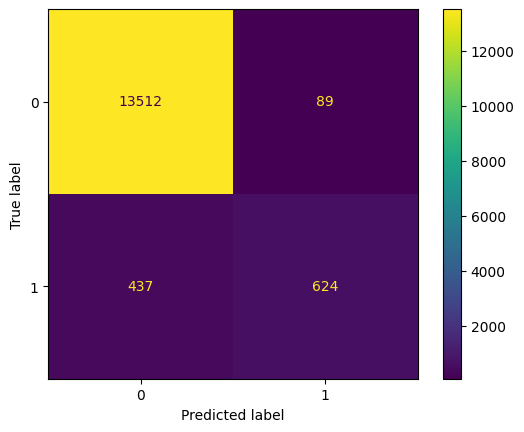

In [62]:
cm = confusion_matrix(y_val, y_pred_val, labels=clf_logis.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_logis.classes_)
disp.plot()

#### Random Forest

In [63]:
balanced_accuracy_train = balanced_accuracy_score(y_train, y_ranf_pre_train)
balanced_accuracy_val = balanced_accuracy_score(y_val, y_ranf_pre_val)
print(balanced_accuracy_train,balanced_accuracy_val)
## Basedline model

0.9222628426993384 0.882032915886528


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10,100,200],
    'max_depth': [None, 15]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf_rand, param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test, y_test)
balanced_accuracy = balanced_accuracy_score(y_test, best_clf.predict(x_test))

print(f"Test Set Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")

Best Parameters:  {'max_depth': None, 'n_estimators': 200}
Test Set Accuracy: 0.9874514083066221
Balanced Accuracy: 0.9269313102895533


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, best_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13504
           1       0.98      0.86      0.92      1159

    accuracy                           0.99     14663
   macro avg       0.99      0.93      0.95     14663
weighted avg       0.99      0.99      0.99     14663

